# Project: Gapminder World data: how the world has changed for 200 years?

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

"Gapminder fights devastating misconceptions about global development. Gapminder produces free teaching resources making the world understandable based on reliable statistics." - source [Gapminder](https://www.gapminder.org/about-gapminder/)

Gapminder was founded by Hans Roosling along with his son and his daughter-in-law. One of their works was published into a book named "Factfulness" which aims to change the way we look at the world mere by data. In this small project, we will try to look at some of the datasets of Gapminder to discover some interesting facts about the global change from 1800-2000. Here are questions we have asked ourselves:

- Which region of the world has been changing relatively quickly compare to others in terms of GDP, life expectancy, and other indices?
- How income, population, child mortality and children born per woman decide the life expectancy of a certain country?

In [1]:
# Importing neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General properties

In [2]:
# Import life expectancy dataframe
life_exp = pd.read_csv('life_expectancy_years.csv')
life_exp.head()

,geo,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,55.7,56.2,56.7,57.2,57.7,57.8,57.9,58.0,58.4,58.7
1,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,75.9,76.3,76.7,77.0,77.2,77.4,77.6,77.7,77.9,78.0
2,Algeria,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,...,76.3,76.5,76.7,76.8,77.0,77.1,77.3,77.4,77.6,77.9
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,82.7,82.7,82.6,82.6,82.6,82.6,82.5,82.5,NaN,NaN
4,Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,59.3,60.1,60.9,61.7,62.5,63.3,64.0,64.7,64.9,65.2


In [3]:
# Importing income per person dataframe
income = pd.read_csv('income_per_person_gdppercapita_ppp_inflation_adjusted.csv')
income.head()

,geo,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,603,603,603,603,603,603,603,603,603,...,1530,1610,1660,1840,1810,1780,1750,1740,1800,1870
1,Albania,667,667,667,667,667,668,668,668,668,...,9530,9930,10200,10400,10500,10700,11000,11400,11900,12400
2,Algeria,715,716,717,718,719,720,721,722,723,...,12600,12900,13000,13200,13300,13500,13700,14000,13800,13700
3,Andorra,1200,1200,1200,1200,1210,1210,1210,1210,1220,...,41700,39000,42000,41900,43700,44900,46600,48200,49800,51500
4,Angola,618,620,623,626,628,631,634,637,640,...,5910,5900,5910,6000,6190,6260,6230,6030,5940,5850


In [4]:
# Importing children per woman dataframe
children_per_woman = pd.read_csv('children_per_woman_total_fertility.csv')
children_per_woman.head()

,geo,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,...,6.04,5.82,5.60,5.38,5.17,4.98,4.80,4.64,4.48,4.33
1,Albania,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,...,1.65,1.65,1.67,1.69,1.70,1.71,1.71,1.71,1.71,1.71
2,Algeria,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,...,2.83,2.89,2.93,2.94,2.92,2.89,2.84,2.78,2.71,2.64
3,Angola,6.93,6.93,6.93,6.93,6.93,6.93,6.93,6.94,6.94,...,6.24,6.16,6.08,6.00,5.92,5.84,5.77,5.69,5.62,5.55
4,Antigua and Barbuda,5.00,5.00,4.99,4.99,4.99,4.98,4.98,4.97,4.97,...,2.15,2.13,2.12,2.10,2.09,2.08,2.06,2.05,2.04,2.03


In [5]:
# Importing population dataframe
population = pd.read_csv('population_total.csv')
population.head()

,geo,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,3280000,3280000,3280000,3280000,3280000,3280000,3280000,3280000,3280000,...,28000000,28800000,29700000,30700000,31700000,32800000,33700000,34700000,35500000,36400000
1,Albania,410000,412000,413000,414000,416000,417000,418000,420000,421000,...,2960000,2940000,2930000,2920000,2920000,2920000,2920000,2930000,2930000,2930000
2,Algeria,2500000,2510000,2520000,2530000,2540000,2550000,2560000,2570000,2580000,...,35500000,36100000,36800000,37600000,38300000,39100000,39900000,40600000,41300000,42000000
3,Andorra,2650,2650,2650,2650,2650,2650,2650,2650,2650,...,84500,84400,83800,82400,80800,79200,78000,77300,77000,77000
4,Angola,1570000,1570000,1570000,1570000,1570000,1570000,1570000,1570000,1570000,...,22500000,23400000,24200000,25100000,26000000,26900000,27900000,28800000,29800000,30800000


In [6]:
# Importing child mortality dataframe
child_mortality = pd.read_csv('child_mortality_0_5_year_olds_dying_per_1000_born.csv')
child_mortality.head()

,geo,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,469.0,469.0,469.0,469.0,469.0,469.0,470.0,470.0,470.0,...,94.1,90.2,86.4,82.8,79.3,76.1,73.2,70.4,68.2,65.9
1,Albania,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,...,17.2,16.6,16.0,15.4,14.9,14.4,14.0,13.5,13.3,12.9
2,Algeria,460.0,460.0,460.0,460.0,460.0,460.0,460.0,460.0,460.0,...,28.3,27.3,26.6,26.1,25.8,25.6,25.5,25.2,23.9,23.1
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.4,3.3,3.2,3.1,3.0,2.9,2.8,2.7,NaN,NaN
4,Angola,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,...,128.0,119.0,111.0,104.0,96.8,91.2,86.5,82.5,83.1,81.6


### Data Cleaning

In [7]:
# Check if there are any missing data, if yes drop the rows containing missing data
def check_and_drop(df):
    if pd.isna(df).sum().sum():
        return df.dropna(axis=0)
    return df
life_exp = check_and_drop(life_exp)
income = check_and_drop(income)
population = check_and_drop(population)
children_per_woman = check_and_drop(children_per_woman)
child_mortality = check_and_drop(child_mortality)

Now to answer the first question as well as simplify other operations for later, we are going to concatenate all the small dataframes created to two ultimate dataframe gapminder_1800 and gapminder_2000

In [8]:
# Merge all the dataframes into a big one
from functools import reduce
df_list = [life_exp, income, population, children_per_woman, child_mortality]

gapminder = reduce(lambda left, right: pd.merge(left, right, on='geo'), df_list)
gapminder.head()

,geo,1800_x,1801_x,1802_x,1803_x,1804_x,1805_x,1806_x,1807_x,1808_x,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,94.1,90.2,86.4,82.8,79.3,76.1,73.2,70.4,68.20,65.90
1,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,17.2,16.6,16.0,15.4,14.9,14.4,14.0,13.5,13.30,12.90
2,Algeria,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,...,28.3,27.3,26.6,26.1,25.8,25.6,25.5,25.2,23.90,23.10
3,Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,128.0,119.0,111.0,104.0,96.8,91.2,86.5,82.5,83.10,81.60
4,Antigua and Barbuda,33.5,33.5,33.5,33.5,33.5,33.5,33.5,33.5,33.5,...,10.6,10.3,9.9,9.6,9.3,9.0,8.7,8.5,8.16,7.89


In [9]:
# Check if there are still any missing data
pd.isna(gapminder).sum().sum()

0

We will just add some little information here about the continent. The dataset ISO-3166 regarding the countries and contients has been used. The .csv file can be found [here](https://github.com/lukes/ISO-3166-Countries-with-Regional-Codes/blob/master/all/all.csv)

In [10]:
# Load the dataframe which contains information about countries and regions
countries_df = pd.read_csv('countries.csv')
countries_df = countries_df.loc[:, ['name', 'region']]
countries_df.head()

,name,region
0,Afghanistan,Asia
1,Åland Islands,Europe
2,Albania,Europe
3,Algeria,Africa
4,American Samoa,Oceania


In [11]:
# Add these information to the final dataframe
gapminder = pd.merge(gapminder, countries_df, how='inner', left_on='geo', right_on='name').drop('name', axis=1)
gapminder.head()

,geo,1800_x,1801_x,1802_x,1803_x,1804_x,1805_x,1806_x,1807_x,1808_x,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,region
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,90.2,86.4,82.8,79.3,76.1,73.2,70.4,68.20,65.90,Asia
1,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,16.6,16.0,15.4,14.9,14.4,14.0,13.5,13.30,12.90,Europe
2,Algeria,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,...,27.3,26.6,26.1,25.8,25.6,25.5,25.2,23.90,23.10,Africa
3,Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,119.0,111.0,104.0,96.8,91.2,86.5,82.5,83.10,81.60,Africa
4,Antigua and Barbuda,33.5,33.5,33.5,33.5,33.5,33.5,33.5,33.5,33.5,...,10.3,9.9,9.6,9.3,9.0,8.7,8.5,8.16,7.89,Americas


In [12]:
# Now get the data in the year 1800 and 2000 and rename the columns
gapminder_1800 = gapminder.filter(regex='1800|geo|region')
gapminder_2000 = gapminder.filter(regex='2000|geo|region')
gapminder_1800.columns = gapminder_2000.columns = ['country', 'life_expectancy', 'income_per_person', 'population', 'children_per_woman', 'child_mortality', 'region']

In [13]:
gapminder_1800.head()

,country,life_expectancy,income_per_person,population,children_per_woman,child_mortality,region
0,Afghanistan,28.2,603,3280000,7.00,469.0,Asia
1,Albania,35.4,667,410000,4.60,375.0,Europe
2,Algeria,28.8,715,2500000,6.99,460.0,Africa
3,Angola,27.0,618,1570000,6.93,486.0,Africa
4,Antigua and Barbuda,33.5,757,37000,5.00,474.0,Americas


In [14]:
gapminder_2000.head()

,country,life_expectancy,income_per_person,population,children_per_woman,child_mortality,region
0,Afghanistan,51.6,972,20100000,7.49,130.0,Asia
1,Albania,74.4,5470,3120000,2.16,26.0,Europe
2,Algeria,73.9,10200,31200000,2.51,39.7,Africa
3,Angola,53.4,3510,16400000,6.64,207.0,Africa
4,Antigua and Barbuda,74.7,18800,83600,2.32,14.9,Americas


In [15]:
# Save the final dataframes to file just in case we want to load them again for other use
gapminder_1800.to_csv('gapminder_1800.csv')
gapminder_2000.to_csv('gapminder_2000.csv')

<a id='eda'></a>
## Exploratory Data Analysis

In [16]:
# Write a function to draw each feature of the dataset
def histogram_draw(feature_name, plot_title):
    plt.hist(gapminder_1800[feature_name], bins=20, alpha=0.5, label='1800')
    plt.hist(gapminder_2000[feature_name], bins=20, alpha=0.5, label='2000')
    plt.title(plot_title)
    plt.xlabel(feature_name)
    plt.ylabel('Frequency')
    plt.legend(loc='upper right')
    plt.show()

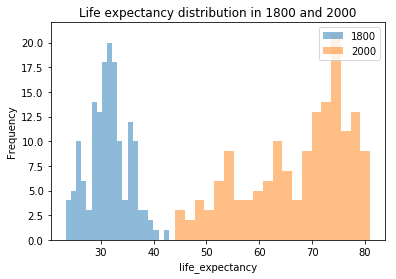

In [17]:
histogram_draw('life_expectancy', 'Life expectancy distribution in 1800 and 2000')

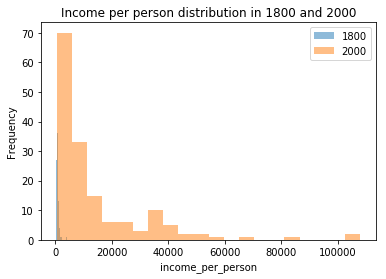

In [18]:
histogram_draw('income_per_person', 'Income per person distribution in 1800 and 2000')

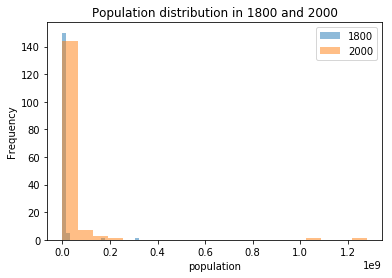

In [19]:
histogram_draw('population', 'Population distribution in 1800 and 2000')

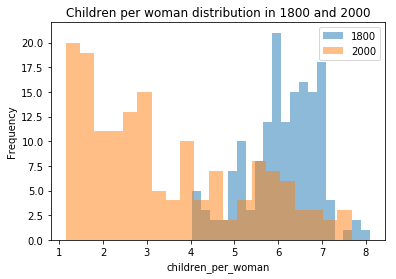

In [20]:
histogram_draw('children_per_woman', 'Children per woman distribution in 1800 and 2000')

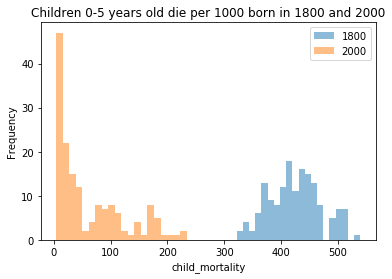

In [21]:
histogram_draw('child_mortality', 'Children 0-5 years old die per 1000 born in 1800 and 2000')

Now let's explore more profoundly using box plots to see changes in each region

In [22]:
# Write a function to draw a box plot for each feature
def box_draw(feature_name, plot_title_1, plot_title_2, log_scale=False):
    gapminder_1800.boxplot(feature_name, by='region', rot=90)
    plt.title(plot_title_1)
    plt.suptitle("")
    plt.xlabel('Region')
    plt.ylabel(feature_name)
    if log_scale: plt.yscale('log')
    
    gapminder_2000.boxplot(feature_name, by='region', rot=90)
    plt.title(plot_title_2)
    plt.suptitle("")
    plt.xlabel('Region')
    plt.ylabel(feature_name)
    if log_scale: plt.yscale('log')

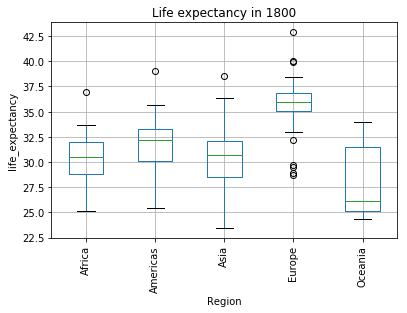

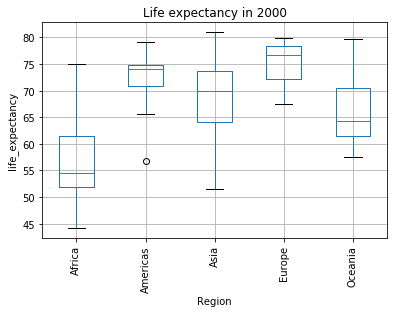

In [23]:
box_draw('life_expectancy', 'Life expectancy in 1800', 'Life expectancy in 2000')

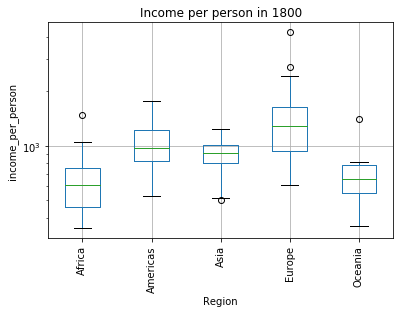

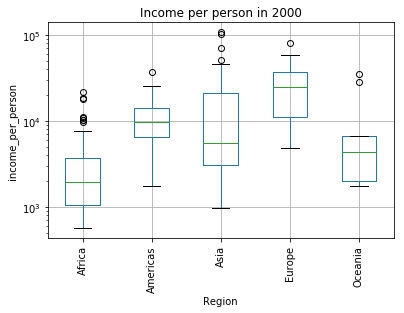

In [24]:
box_draw('income_per_person', 'Income per person in 1800', 'Income per person in 2000', True)

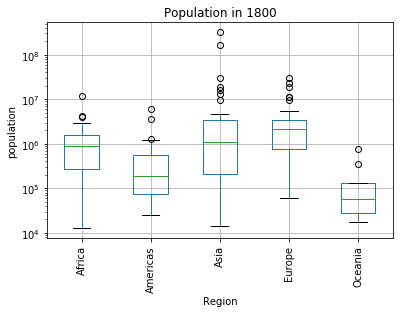

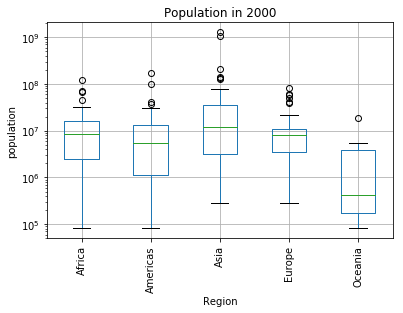

In [25]:
box_draw('population', 'Population in 1800', 'Population in 2000', True)

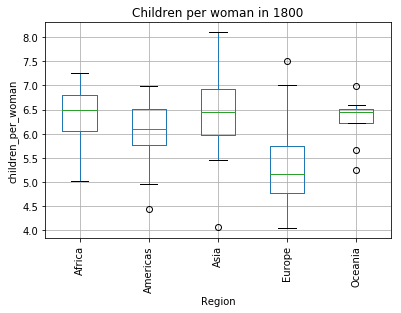

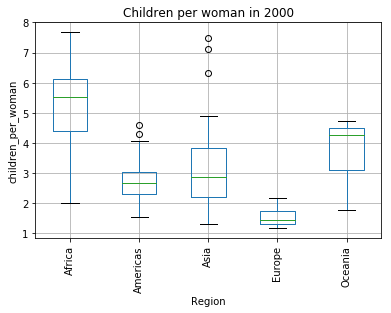

In [26]:
box_draw('children_per_woman', 'Children per woman in 1800', 'Children per woman in 2000')

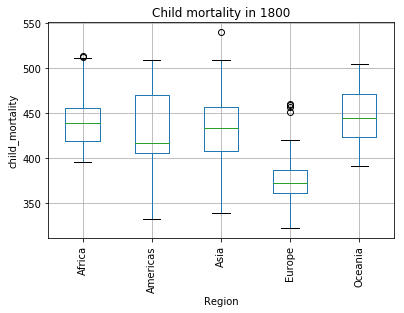

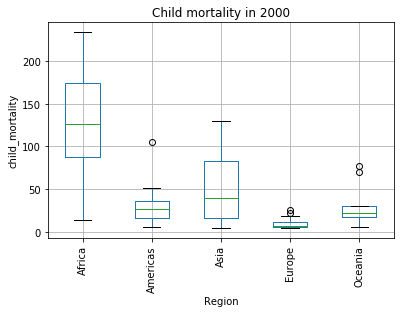

In [27]:
box_draw('child_mortality', 'Child mortality in 1800', 'Child mortality in 2000')

###  Question 1:

_**Which region of the world has been changing relatively quick compare to others in terms of GDP, life expectancy, and other indices?**_

#### Life expectancy
**Definition:** The average number of years a newborn child would live if current mortality patterns were to stay the same.

As we can observe firstly in the histogram, life expectancy was improved significantly between the year 1800 and 2000 as there is no overlapping in the plot. Move on to the box plot, it seems that Asian, European, and American countries have remarkably augmented their life expectancy. Now let's see which continent improve it most.

In [28]:
life_region_1800 = gapminder_1800.groupby('region')['life_expectancy'].mean()
life_region_1800

region
Africa      30.304167
Americas    31.782143
Asia        30.197436
Europe      35.615152
Oceania     28.166667
Name: life_expectancy, dtype: float64

In [29]:
life_region_2000 = gapminder_2000.groupby('region')['life_expectancy'].mean()
life_region_2000

region
Africa      56.806250
Americas    72.689286
Asia        69.171795
Europe      75.554545
Oceania     66.977778
Name: life_expectancy, dtype: float64

In [30]:
life_change = life_region_2000 - life_region_1800
print "The contient which has changed most in life expectancy is: %s" % (life_change.idxmax())

The contient which has changed most in life expectancy is: Americas


#### Income
**Definition:** Gross domestic product per person adjusted for differences in purchasing power (in international dollars, fixed 2011 prices, PPP based on 2011 ICP)

In the distribution plot, the difference between income per person of 1800 and 2000 was huge that we can merely see the one of 1800. This difference can be observed again in the box plot among regions where Asia seems to have the biggest change. Let's verify that

In [31]:
income_region_1800 = gapminder_1800.groupby('region')['income_per_person'].mean()
income_region_1800

region
Africa       633.166667
Americas    1028.535714
Asia         881.846154
Europe      1421.454545
Oceania      707.222222
Name: income_per_person, dtype: float64

In [32]:
income_region_2000 = gapminder_2000.groupby('region')['income_per_person'].mean()
income_region_2000

region
Africa       4022.604167
Americas    11118.928571
Asia        18172.615385
Europe      26736.666667
Oceania      9727.777778
Name: income_per_person, dtype: float64

In [33]:
income_change = income_region_2000 - income_region_1800
print "The continent which has changed most in income per person is: %s" % income_change.idxmax()

The continent which has changed most in income per person is: Europe


#### Population
**Definition:** Total population

The same as income, there is a huge difference between population of 1800 and 2000. While in 1800, most of countries share the same population, in 2000, there are two or three countries who have more people than the rest of the world. In the box plots, we have these countries as outliers.

In [34]:
population_region_1800 = gapminder_1800.groupby('region')['population'].mean()
population_region_1800

region
Africa      1.323533e+06
Americas    6.513393e+05
Asia        1.578419e+07
Europe      4.509467e+06
Oceania     1.673000e+05
Name: population, dtype: float64

In [35]:
population_region_2000 = gapminder_2000.groupby('region')['population'].mean()
population_region_2000

region
Africa      1.486134e+07
Americas    1.850591e+07
Asia        8.846679e+07
Europe      1.513445e+07
Oceania     3.366278e+06
Name: population, dtype: float64

In [36]:
population_change = population_region_1800 - population_region_2000
print "The contient which has changed most in population is: %s" % population_change.idxmax()

The contient which has changed most in population is: Oceania


#### Children per woman
**Definition:** Total fertility rate. The number of children that would be born to each woman with prevailing age-specific fertility rates.

There is a decrese in the number of children between 1800 and 2000. However, there is still an overlappping in the middle of the plot. While America, Europe, and Asia have dropped their fertility notably, the number of children per woman in Africa still remains high.

In [37]:
fertility_region_1800 = gapminder_1800.groupby('region')['children_per_woman'].mean()
fertility_region_1800

region
Africa      6.399167
Americas    6.022500
Asia        6.428205
Europe      5.233939
Oceania     6.290000
Name: children_per_woman, dtype: float64

In [38]:
fertility_region_2000 = gapminder_2000.groupby('region')['children_per_woman'].mean()
fertility_region_2000

region
Africa      5.217708
Americas    2.733929
Asia        3.143333
Europe      1.520303
Oceania     3.695556
Name: children_per_woman, dtype: float64

In [39]:
fertility_change = fertility_region_1800 - fertility_region_2000
print "The contient which has changed most in fertility is: %s" % fertility_change.idxmax()

The contient which has changed most in fertility is: Europe


#### Child mortality
**Definition:** Death of children under five years of age per 1000 live births

Thanks to the development of health care system all over the world, we can see a clear gap between two distribution of 1800 and 2000. Let's see how this difference varies among regions

In [40]:
mortality_region_1800 = gapminder_1800.groupby('region')['child_mortality'].mean()
mortality_region_1800

region
Africa      442.229167
Americas    431.285714
Asia        434.358974
Europe      379.666667
Oceania     445.000000
Name: child_mortality, dtype: float64

In [41]:
mortality_region_2000 = gapminder_2000.groupby('region')['child_mortality'].mean()
mortality_region_2000

region
Africa      128.043750
Americas     29.214286
Asia         49.512821
Europe        9.193939
Oceania      31.300000
Name: child_mortality, dtype: float64

In [42]:
mortality_change = mortality_region_1800 - mortality_region_2000
print "The continent which has changed most in child mortality is: %s" % mortality_change.idxmax()

The continent which has changed most in child mortality is: Oceania


### Question 2:

_**How income, population, child mortality and children born per woman decide the life expectancy of a certain country?**_

To answer this question, we will investigate the dataset on only a small set of countries. First, we need to create for each country their corresponding data from 1800 to 2000.

In [43]:
# Create a list of 5 different countries
five_countries = ['Colombia', 'Nigeria', 'Germany', 'China', 'Australia']

In [44]:
# Write a function to return a dataframe for a country
def make_dataframe_for_country(country_name):
    df = pd.DataFrame()
    df['life_expectancy'] = life_exp.query('geo == @country_name').loc[:, '1800':'2000'].transpose().iloc[:,0] # get the Series instead of DataFrame
    df['income_per_person'] = income.query('geo == @country_name').loc[:, '1800':'2000'].transpose().iloc[:,0]
    df['population'] = population.query('geo == @country_name').loc[:, '1800':'2000'].transpose().iloc[:,0]
    df['child_mortality'] = child_mortality.query('geo == @country_name').loc[:, '1800':'2000'].transpose().iloc[:,0]
    df['children_per_woman'] = children_per_woman.query('geo == @country_name').loc[:, '1800':'2000'].transpose().iloc[:,0]
    df.index = pd.to_datetime(df.index) # convert index to datetime
    return df

In [45]:
five_countries_df = list(map(make_dataframe_for_country, five_countries))

In [46]:
five_countries_df[-1].head()

,life_expectancy,income_per_person,population,child_mortality,children_per_woman
1800-01-01 00:00:00,34.0,814,351000,391.0,6.50
1801-01-01 00:00:00,34.0,816,350000,391.0,6.48
1802-01-01 00:00:00,34.0,818,349000,391.0,6.46
1803-01-01 00:00:00,34.0,820,348000,391.0,6.44
1804-01-01 00:00:00,34.0,822,348000,391.0,6.42


There is still the problem with this dataframe nevertheless as we can see some values don't change much throughout the year, so we might need to resample our dataset

In [47]:
five_countries_df = [df.resample('10Y').mean() for df in five_countries_df]
five_countries_df[-1].head()

,life_expectancy,income_per_person,population,child_mortality,children_per_woman
1800-12-31 00:00:00,34.0,814.0,351000.0,391.0,6.500
1810-12-31 00:00:00,34.0,824.5,346200.0,391.0,6.390
1820-12-31 00:00:00,34.0,844.0,337500.0,391.0,6.190
1830-12-31 00:00:00,34.0,1037.9,337800.0,391.0,5.957
1840-12-31 00:00:00,34.0,1765.0,389000.0,391.0,5.557


In [48]:
# Write a function to draw a plot for a feature
def draw_one_feature(feature_name, country_df, country_name):
    plt.plot(country_df[feature_name], label=country_name)
    plt.title(feature_name + ' from 1800 to 2000 for all countries')
    plt.legend(loc='upper left')

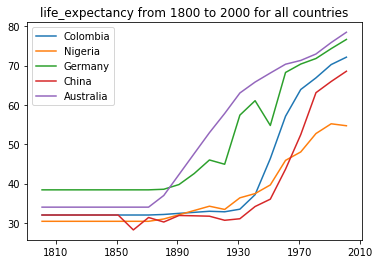

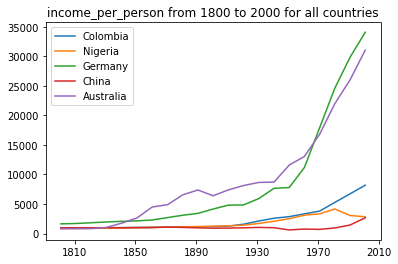

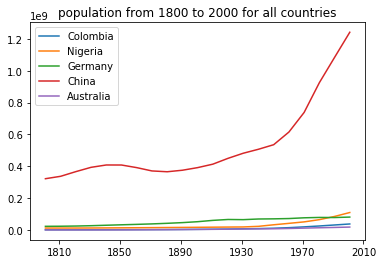

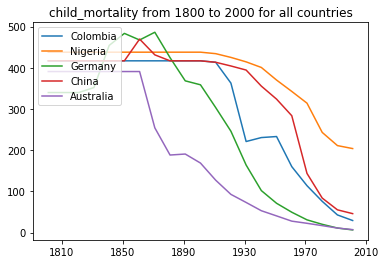

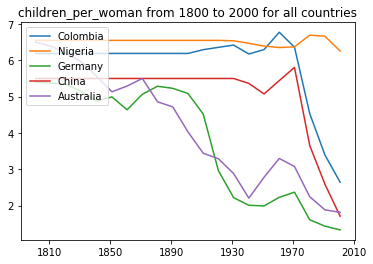

In [49]:
feature_list = five_countries_df[-1].columns
for i in range(len(feature_list)):
    plt.figure(i, figsize=(6,4))
    map(draw_one_feature, [feature_list[i]]*len(five_countries_df), five_countries_df, five_countries)
plt.show()

Let's stop here a little and try to refind what we concluded in our first question by revising the plot of each feature:

- **Life expectancy:** no surprising that countries in Europe and Americas have the biggest improvement in terms of average age limit. 
- **Income per person:** another winning for Europe and Americas. Despite being a fast developing country, China has its income per person quite modest.
- **Population:** while other countries don't have any significant change in the number of inhabitants, China has shown a remarkable increase.
- **Children per woman and child mortality:** African countries still do not have any big change in these two indices whereas countries in Europe, Asia, and Americas decreased their number notably. 

In [50]:
# Write a function to draw scatter plot
def draw_one_feature_scatter(feature_name, country_df, country_name):
    plt.scatter(country_df[feature_name], country_df.life_expectancy, label=country_name, alpha=0.5)
    plt.title(feature_name + ' vs life expectancy in all countries from 1800 to 2000')
    plt.legend(loc='lower right')

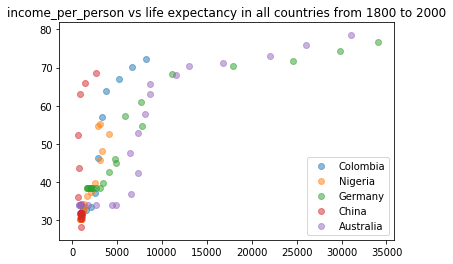

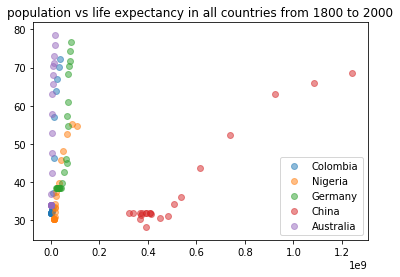

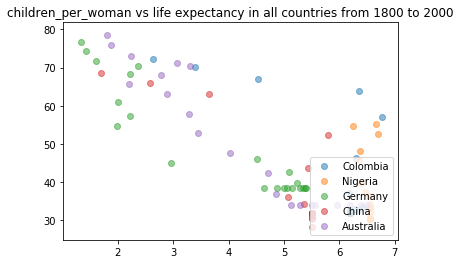

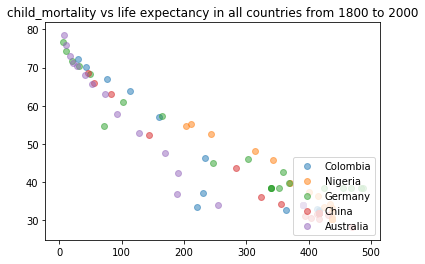

In [51]:
# Now let's try with some correlation plot
feature_list_to_compare = ['income_per_person', 'population', 'children_per_woman', 'child_mortality']
for i in range(len(feature_list_to_compare)):
    plt.figure(i, figsize=(6,4))
    map(draw_one_feature_scatter, [feature_list_to_compare[i]]*len(five_countries_df), five_countries_df, five_countries)
plt.show()

As from the correlation plots, the answer to our quetion seems to be that while income per person has the positive correlation to the average life expectancy, number of children per woman and child mortality have the negative correlation. Concerning population, apart from China, this indice doesn't have significant effect on life expectancy.

### Limitation
This section aims to address the challenges that I personally faced while implementing this project. 

- The first challenge that I had is to pick the data. The whole dataset combined of many indicies (income, life expectancy, education, etc.) so I had to decide which one to take in order to carry out this project.

- Next, I had some difficulties trying to put all the dataset into a right place. At first I was doing this manually, but then I took advantages of Pandas and Numpy operation to make this lot quicker.

- The data does not contain information about the region for each country, therefore I have to look somewhere else this information to answer my questions.

<a id='conclusions'></a>
## Conclusions

The goal of this project is to investigate a real dataset using analysis technique. The two questions posed at the beginning of the project have been answered through statistics and visualizations. With this dataset from Gapminder, we could have another view of the world based merely on data and appropriate communication. The future work for this project might be to explore more foundly the data by pointing out certain trends or several big events which effect the world's data such as world war or natural disater.